Visualize full pipeline of the study

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.callbacks import *
from fastai.script import *

from data_utils import *
from models import *
from learn_utils import *

Available data in test folder: 

- `raw_images`: Raw images before normalization
- `brain_preds`: Brain segmentation predictions from best model
- `skull_stripped_v2`: Skull stripped raw images
- `ventricle_preds`: Ventricle segmentation predictions from best model

In [5]:
test_path = Path("/home/turgutluk/data/Segmentation_Dataset/CT_Dataset/test2/")

In [6]:
data_name = 'notl_brain_ct'
f = data_dict[data_name]
train_paths, valid_paths, test1_paths, test2_paths = f()

In [7]:
raw_images = get_files(test_path/'raw_images')
brain_preds, _ = pd.read_pickle(test_path/'brain_preds/baseline11_preds.pkl')
skull_stripped_raw_images = get_files(test_path/'skull_stripped_v2')
ventricle_preds, _ = pd.read_pickle(test_path/'ventricle_preds/baseline11_preds.pkl')

In [8]:
len(raw_images), len(brain_preds), len(skull_stripped_raw_images), len(ventricle_preds)

(18, 18, 18, 18)

### Plot inference pipeline

In [9]:
from IPython.display import FileLink

In [32]:
i = 2

In [33]:
fname = test2_paths[0][i].name; fname

'CT-Test-002_20150324092115.000_2.16.840_.536.583_RTst_2015-03-24_092115_CT.BRAIN.WITHOUT.CONTRAST_._n1__00000_CT.npy'

In [34]:
raw_image = np.load(test_path/f'raw_images/{fname}')

brain_pred = to_np(brain_preds[i])
atlas_brain_pred = np.load(test_path/f'brain_atlas/{fname}')
brain_mask = np.load(test_path/f'brain_masks/{fname}')

skull_stripped_raw_image = np.load(test_path/f'skull_stripped_v2/{fname}')

ventricle_pred = to_np(ventricle_preds[i])
atlas_ventricle_pred = np.load(test_path/f'ventricle_atlas/{fname}')
ventricle_mask = np.load(test_path/f'ventricle_masks/{fname}')

In [35]:
(raw_image.shape, brain_pred.shape, atlas_brain_pred.shape, brain_mask.shape, 
 skull_stripped_raw_image.shape, ventricle_pred.shape, atlas_ventricle_pred.shape, ventricle_mask.shape)

((128, 256, 256),
 (128, 256, 256),
 (128, 256, 256),
 (128, 256, 256),
 (128, 256, 256),
 (128, 256, 256),
 (128, 256, 256),
 (128, 256, 256))

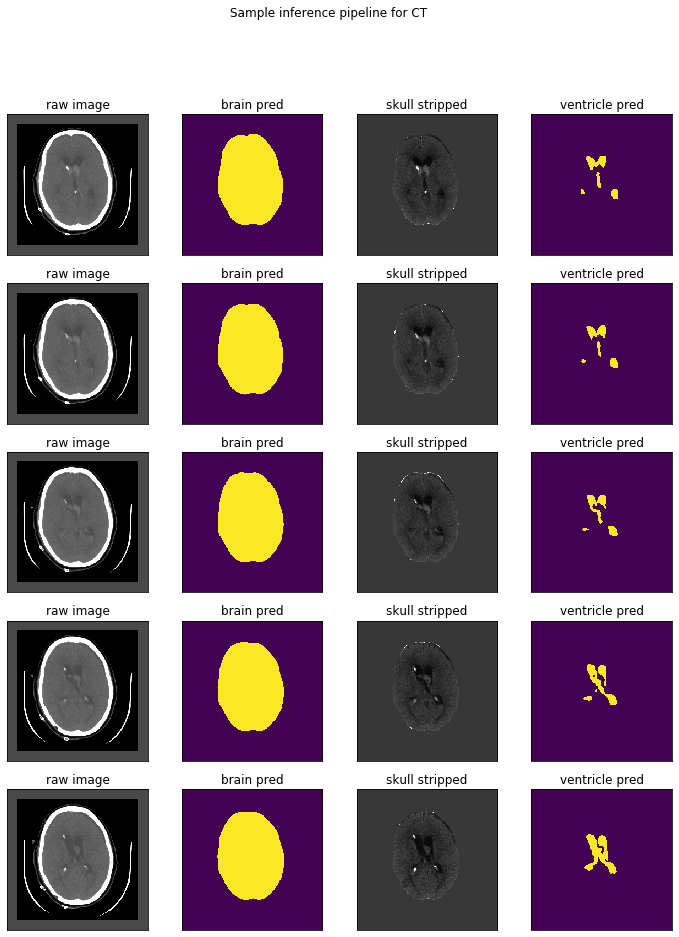

In [36]:
# Inference pipeline plot
s,e = 65,70
fig, axes = plt.subplots((e-s), 4, figsize=(4*3, (e-s)*3))

for ax,im1,im2,im3,im4 in \
    zip(axes, raw_image[s:e], brain_pred[s:e], 
                skull_stripped_raw_image[s:e], ventricle_pred[s:e]):
    for _ax in ax:
        _ax.get_xaxis().set_visible(False)
        _ax.get_yaxis().set_visible(False)
    
    im1 = np.clip(im1, -100, 250) # ct contrast
    
    ax[0].imshow(im1, cmap='gray'); ax[0].set_title('raw image');
    ax[1].imshow(im2); ax[1].set_title('brain pred');
    
    ax[2].imshow(im3, cmap='gray'); ax[2].set_title('skull stripped');
    
    ax[3].imshow(im4); ax[3].set_title('ventricle pred');
    fig.suptitle("Sample inference pipeline for CT")

In [48]:
# savefig
figpath = "/home/turgutluk/data/Segmentation_Dataset/CT_Dataset/sample_inference_CT.jpg"
fig.savefig(figpath, dpi=300)
FileLink(figpath)

/home/turgutluk/data/Segmentation_Dataset/CT_Dataset/sample_inference_CT.jpg

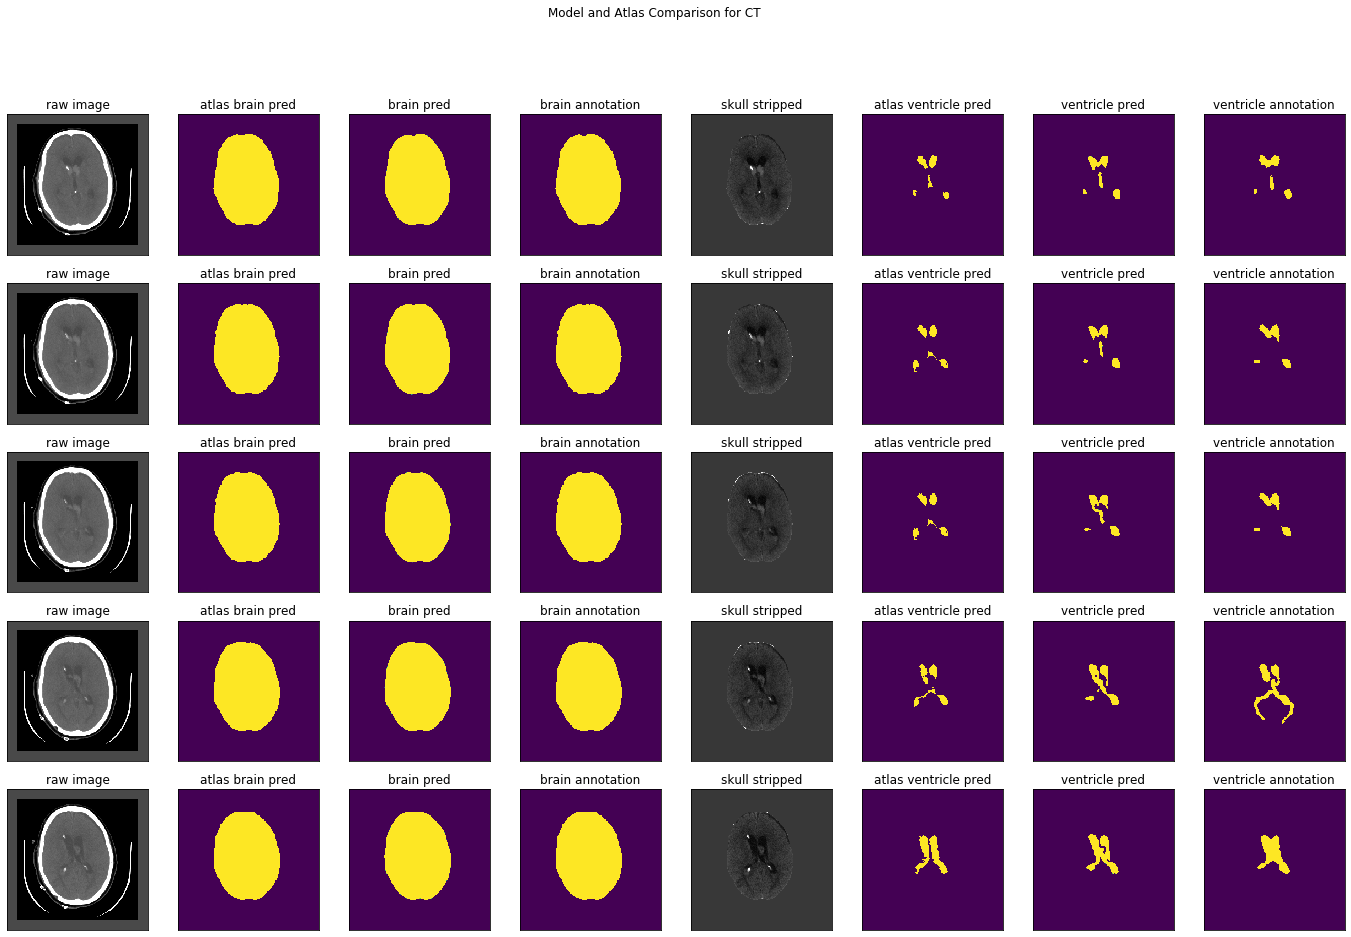

In [37]:
# Prediction and atlas comparison plot
s,e = 65,70
fig, axes = plt.subplots((e-s), 8, figsize=(8*3, (e-s)*3))

for ax,im1,im2,im3,im4,im5,im6,im7,im8 in \
    zip(axes, raw_image[s:e], atlas_brain_pred[s:e], brain_pred[s:e], brain_mask[s:e], 
                skull_stripped_raw_image[s:e], atlas_ventricle_pred[s:e], ventricle_pred[s:e], ventricle_mask[s:e]):
    for _ax in ax:
        _ax.get_xaxis().set_visible(False)
        _ax.get_yaxis().set_visible(False)
    
    im1 = np.clip(im1, -100, 250) # ct contrast
        
    ax[0].imshow(im1, cmap='gray'); ax[0].set_title('raw image');
    
    ax[1].imshow(im2); ax[1].set_title('atlas brain pred');
    ax[2].imshow(im3); ax[2].set_title('brain pred');
    ax[3].imshow(im4); ax[3].set_title('brain annotation');
    
    ax[4].imshow(im5, cmap='gray'); ax[4].set_title('skull stripped');
    
    ax[5].imshow(im6); ax[5].set_title('atlas ventricle pred');
    ax[6].imshow(im7); ax[6].set_title('ventricle pred');
    ax[7].imshow(im8); ax[7].set_title('ventricle annotation');
    
    fig.suptitle("Model and Atlas Comparison for CT")

In [50]:
# savefig
figpath = "/home/turgutluk/data/Segmentation_Dataset/CT_Dataset/model_atlas_comparison_CT.jpg"
fig.savefig(figpath, dpi=300)
FileLink(figpath)

/home/turgutluk/data/Segmentation_Dataset/CT_Dataset/model_atlas_comparison_CT.jpg

### pre - post surgery 

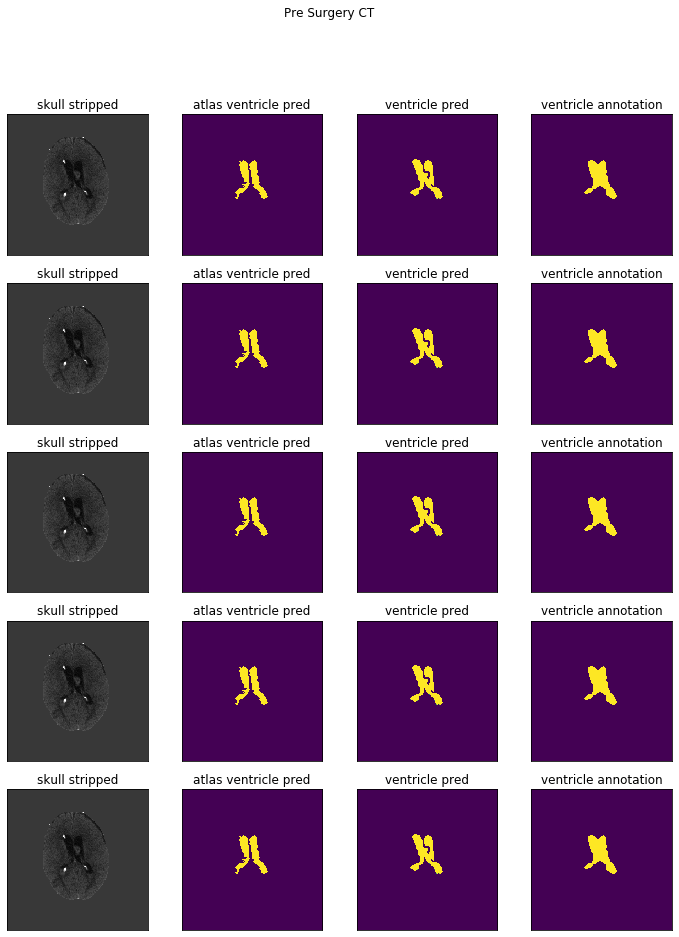

In [39]:
# Prediction and atlas comparison plot
s,e = 65,70
fig, axes = plt.subplots((e-s), 4, figsize=(4*3, (e-s)*3))

for ax,im1,im2,im3,im4 in \
    zip(axes, skull_stripped_raw_image[s:e], atlas_ventricle_pred[s:e], ventricle_pred[s:e], ventricle_mask[s:e]):
    for _ax in ax:
        _ax.get_xaxis().set_visible(False)
        _ax.get_yaxis().set_visible(False)
    
            
    ax[0].imshow(im5, cmap='gray'); ax[0].set_title('skull stripped');    
    ax[1].imshow(im6); ax[1].set_title('atlas ventricle pred');
    ax[2].imshow(im7); ax[2].set_title('ventricle pred');
    ax[3].imshow(im8); ax[3].set_title('ventricle annotation');
    
    fig.suptitle("Pre Surgery CT")

In [40]:
# savefig
figpath = "/home/turgutluk/data/Segmentation_Dataset/CT_Dataset/pre_surgery_CT.jpg"
fig.savefig(figpath, dpi=300)
FileLink(figpath)

/home/turgutluk/data/Segmentation_Dataset/CT_Dataset/pre_surgery_CT.jpg